In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pycountry
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

import preprocess as pre

In [52]:
users_file = "BX-Users.csv"
books_file = "BX-Books.csv"
rating_file = "BX-Ratings.csv"
new_users_file = "BX-NewBooksUsers.csv"
new_books_file = "BX-NewBooks.csv"
new_ratings_file = "BX-NewBooksRatings.csv"

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,152834,boston,massachusetts,united states,5.0,0-10,0449912558,8,the sparrow,mary doria russell,1997,fawcett books,high
1,188021,boston,massachusetts,united states,24.0,20-30,0449912558,8,the sparrow,mary doria russell,1997,fawcett books,high
2,90616,southfield,michigan,united states,25.0,20-30,0449912558,10,the sparrow,mary doria russell,1997,fawcett books,high
3,175228,seattle,washington,united states,25.0,20-30,0449912558,7,the sparrow,mary doria russell,1997,fawcett books,high
4,2891,beaverton,oregon,united states,25.0,20-30,0449912558,9,the sparrow,mary doria russell,1997,fawcett books,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204159,199416,houma,louisiana,canada,65.0,60-70,0679423869,5,in love with norma loquendi,william safire,1994,random house inc,medium
204160,118632,atlanta,georgia,united states,64.0,60-70,0312853807,7,zero coupon,paul erdman,1993,st martins pr,high
204161,160697,erie,pennsylvania,united states,67.0,60-70,0312853807,7,zero coupon,paul erdman,1993,st martins pr,high
204162,14449,saskatoon,saskatchewan,canada,72.0,70-80,0312853807,8,zero coupon,paul erdman,1993,st martins pr,high


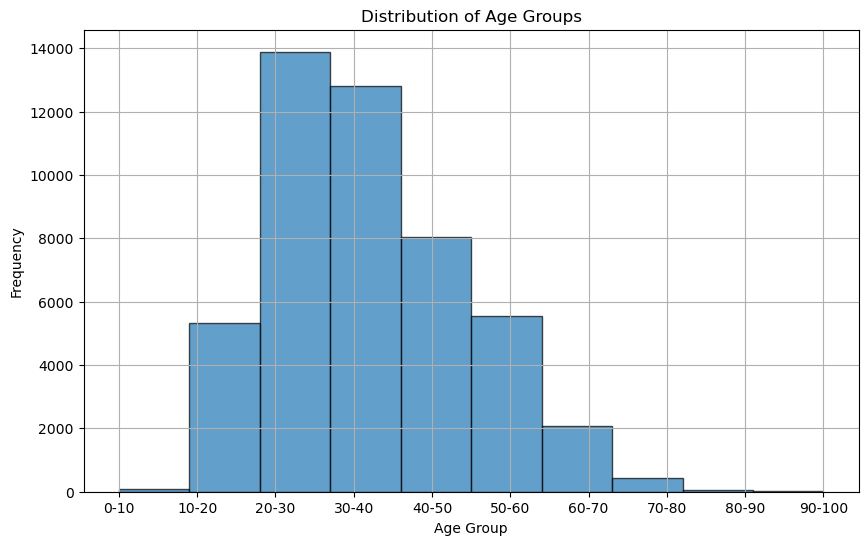

In [53]:
users_df = pd.read_csv(users_file)
ratings_df = pd.read_csv(rating_file)
books_df = pd.read_csv(books_file)

# Imputation missing data and discretise the age based on an age group
users_df = pre.ages_imputation(pre.weighted_age_dict(users_file), users_df)
users_df = pre.city_imputation(users_df)
users_df = pre.state_imputation(users_df)
users_df = pre.country_imputation(users_df)
merged_df = pre.discretising(users_df, ratings_df, books_df)
merged_df = pre.author_imputation(merged_df)
merged_df = pre.text_process(merged_df)
merged_df.to_csv("merge.csv", index=False)

merged_df

Text processing frist step: Write everyting into uppercase, unitify the counties of users.

# For Test Set

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Rating_Category
0,34636,orlando,florida,united states,5.0,0-10,0451405609,7,busy bodies: a claire malloy mystery (claire m...,joan hess,1996,onyx books,high
1,181076,stony plain,alberta,canada,53.0,50-60,0451405609,8,busy bodies: a claire malloy mystery (claire m...,joan hess,1996,onyx books,high
2,213531,bolingbrook,illinois,united states,63.0,60-70,0451405609,9,busy bodies: a claire malloy mystery (claire m...,joan hess,1996,onyx books,high
3,40052,lakewood,colorado,united states,5.0,0-10,0786710624,5,have you seen me?,laura denham,2002,carroll & graf publishers,medium
4,166409,richmond,virginia,united states,63.0,60-70,0786710624,5,have you seen me?,laura denham,2002,carroll & graf publishers,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,267635,bartlesville,oklahoma,united states,69.0,60-70,0553583999,8,may there be a road,louis l'amour,2002,bantam books,high
23141,273190,coconut grove,metro manila,turkey,71.0,70-80,091482967X,7,the blessings already are,john morton,2000,mandeville press,high
23142,155913,regensburg,bayern,germany,75.0,70-80,0385469012,9,arabian nights and days,naguib mahfouz,1995,anchor,high
23143,88389,severna park,maryland,united states,77.0,70-80,0310405009,6,a rustle of angels: stories about angels in re...,marilynn carlson webber,1994,zondervan,medium


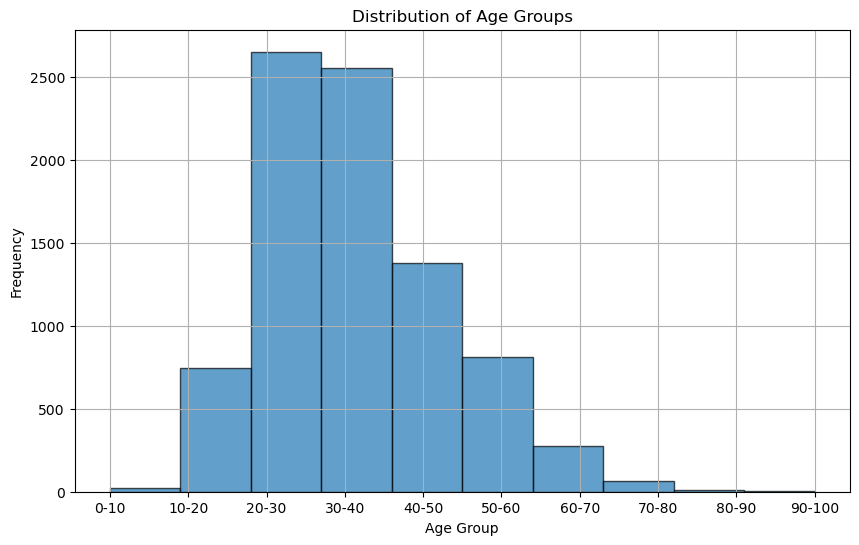

In [54]:
new_users_df = pd.read_csv(new_users_file)
new_ratings_df = pd.read_csv(new_ratings_file)
new_books_df = pd.read_csv(new_books_file)

# Imputation missing data and discretise the age based on an age group
new_users_df = pre.ages_imputation(pre.weighted_age_dict(new_users_file), new_users_df)
new_users_df = pre.city_imputation(new_users_df)
new_users_df = pre.state_imputation(new_users_df)
new_users_df = pre.country_imputation(new_users_df)
test_merged_df = pre.discretising(new_users_df, new_ratings_df, new_books_df)
test_merged_df = pre.author_imputation(test_merged_df)
test_merged_df = pre.text_process(test_merged_df)
test_merged_df

In [55]:
for feature in [
    "User-City",
    "User-State",
    "User-Country",
    "Age-Group",
    "Book-Author",
    "Year-Of-Publication",
    "Book-Publisher",
    "Book-Title"
]:
    print(
        feature,
        pre.compute_information_gain(
            merged_df[feature], merged_df["Rating_Category"]
        ).round(4),
    )

KeyboardInterrupt: 

In [ ]:
# Deleted Features with low IG to train the DT
new_features = [
    "User-City",
    "Book-Author",
    "Book-Title",
]

train_X = OrdinalEncoder().fit_transform(merged_df[new_features])
train_y = OrdinalEncoder().fit_transform(merged_df[["Rating_Category"]])

test_X = OrdinalEncoder().fit_transform(test_merged_df[new_features])
test_y = OrdinalEncoder().fit_transform(test_merged_df[["Rating_Category"]])

# Initialise the DT
dt_classifier = DecisionTreeClassifier(criterion="entropy")

# Train the model
dt_classifier.fit(train_X, train_y)

pred_y = dt_classifier.predict(test_X)

accuracy = accuracy_score(pred_y, test_y)
print(accuracy)

0.6224238496435516


## Try K-NN

## BOW vectors for books' name

In [64]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming merged_df["Book-Title"] contains the book titles
book_names = set(merged_df["Book-Title"])

# Preprocessing and tokenization
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and duplicates
    tokens = set([word for word in tokens if word not in stopwords.words('english')])
    return " ".join(tokens)

# Preprocess book names
preprocessed_books = [preprocess_text(book) for book in book_names]

# Creating bag-of-words vectors
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_books)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/skylarhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skylarhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


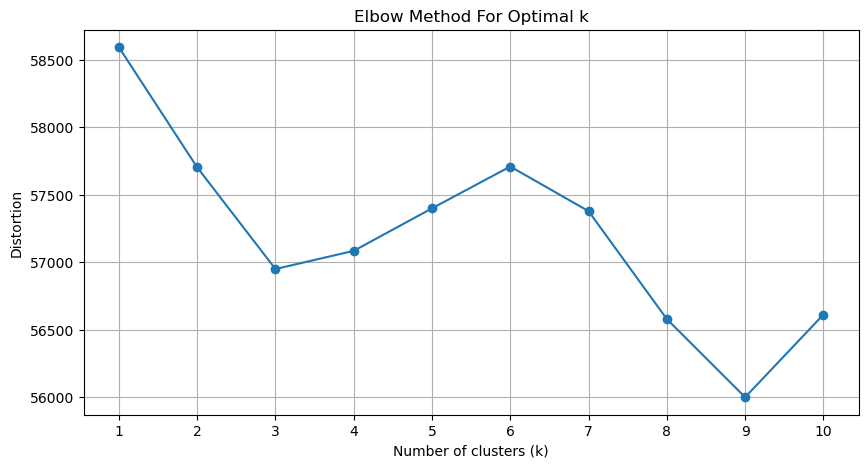

In [70]:
# Calculate distortion for a range of number of cluster
distortions = []
K_range = range(1, 11)  # Trying k from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bow_matrix)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [66]:
# Perform K-means clustering
num_clusters = 9  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(bow_matrix)

# Get cluster labels and assign each book to a cluster
cluster_labels = kmeans.labels_
book_clusters = {}
for i, book in enumerate(book_names):
    cluster = cluster_labels[i]
    if cluster not in book_clusters:
        book_clusters[cluster] = []
    book_clusters[cluster].append(book)

# Print out the clusters
for cluster, books in book_clusters.items():
    print(f"Cluster {cluster + 1}:")
    for book in books:
        print(f"- {book}")

Cluster 1:
- the velveteen rabbit (little golden book)
- le divorce (william abrahams book)
- the three bears (first little golden book)
- western garden book
- arrow's flight (the heralds of valdemar, book 2)
- prentice alvin (tales of alvin maker, book 3)
- eeyore, be happy (little golden book)
- fool moon (the dresden files, book 2)
- sylvia browne's book of angels
- when comes the spring (canadian west, book 2)
- the runelords: the sum of all men (the runelords, book one)
- convergence : book one of the blending (blending)
- onegai teacher book 1
- i spy mystery:  a book of picture riddles
- daughter of fortune : a novel (oprah's book club (hardcover))
- dune messiah (dune chronicles, book 2)
- catfantastic ii (daw book collectors)
- somebody's darling (a touchstone book)
- way of the peaceful warrior, 20th anniversary edition: a book that changes lives
- the fifth dominion (imajica, book 1)
- a game of thrones (a song of ice and fire, book 1)
- song of susannah (the dark tower, bo